Initializing library

In [2]:
import pandas as pd
import numpy as np
import pylab as P
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Read the data into python and clean up the data

In [3]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
from datetime import date as datepy

year = np.zeros(len(df))
month = np.zeros(len(df))
date = np.zeros(len(df))
hour = np.zeros(len(df))
minute = np.zeros(len(df))
second = np.zeros(len(df))
weekday = np.zeros(len(df))

for i in range(len(df.datetime)):
    year[i] = df['datetime'][i][0:4]
    month[i] = df['datetime'][i][5:7]
    date[i] = df['datetime'][i][8:10]
    hour[i] = df['datetime'][i][11:13]
    weekday[i] = datepy(int(year[i]),int(month[i]),int(date[i])).isoweekday()

df['year'] = year
df['month'] = month
df['date'] = date
df['hour'] = hour
df['weekday'] = weekday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null float64
month         10886 non-null float64
date          10886 non-null float64
hour          10886 non-null float64
weekday       10886 non-null float64
dtypes: float64(8), int64(8), object(1)
memory usage: 1.5+ MB


In [6]:
#for the test data
from datetime import date as datepy

year_test = np.zeros(len(df_test))
month_test = np.zeros(len(df_test))
date_test = np.zeros(len(df_test))
hour_test = np.zeros(len(df_test))
minute_test = np.zeros(len(df_test))
second_test = np.zeros(len(df_test))
weekday_test = np.zeros(len(df_test))

for i in range(len(df_test.datetime)):
    year_test[i] = df_test['datetime'][i][0:4]
    month_test[i] = df_test['datetime'][i][5:7]
    date_test[i] = df_test['datetime'][i][8:10]
    hour_test[i] = df_test['datetime'][i][11:13]
    weekday_test[i] = datepy(int(year_test[i]),int(month_test[i]),int(date_test[i])).isoweekday()


df_test['year'] = year_test
df_test['month'] = month_test
df_test['date'] = date_test
df_test['hour'] = hour_test
df_test['weekday'] = weekday_test


We are going to separately count for casual and registered users, and add their predictions at the end for total number of users.

In [8]:
X = df.drop(['datetime'],axis =1 )

y_casual = X['casual'][0::]
y_registered = X['registered'][0::]
y = X['count'][0::]
y = y.values
y_casual = y_casual.values
y_registered = y_registered.values
X = X.drop(['count','casual','registered'],axis = 1)
X = X.values

In [10]:
# for the test value
X_test = df_test.drop(['datetime'],axis =1 )
X_test = X_test.values

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train.shape, X_test.shape

#testing out the cross val score
print( cross_val_score(RandomForestRegressor(200), X, y_casual, cv=4) )


[ 0.52435405  0.80621411  0.77450505  0.7964341 ]


In [9]:
#model = RandomForestRegressor(25,max_depth = 17).fit(X,y)
#print(model.feature_importances_)
#print(df.info())
#plt.scatter(range(41),model.feature_importances_)

Plotting the validation curve, define the scoring by rms error, and plot with error bar.

In [14]:
from sklearn.learning_curve import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((np.log(y_pred+1)-np.log(y+1)) ** 2))
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

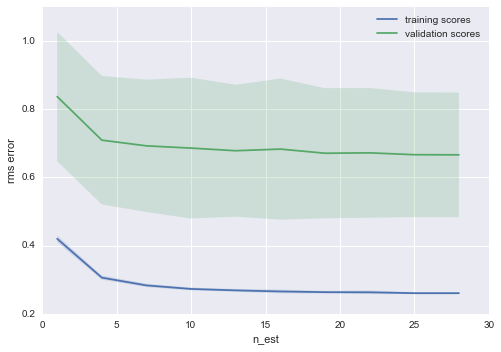

In [16]:
#varying the n_estimators for casual users
n_est = range(1,30,3)
val_train, val_test = validation_curve(RandomForestRegressor(max_depth = 17), X, y_casual,
                                       'n_estimators',n_est, cv=10,
                                       scoring=rms_error)
plot_with_err(n_est, val_train, label='training scores')
plot_with_err(n_est, val_test, label='validation scores')
plt.xlabel('n_est'); plt.ylabel('rms error')
plt.legend();
plt.title('casual')

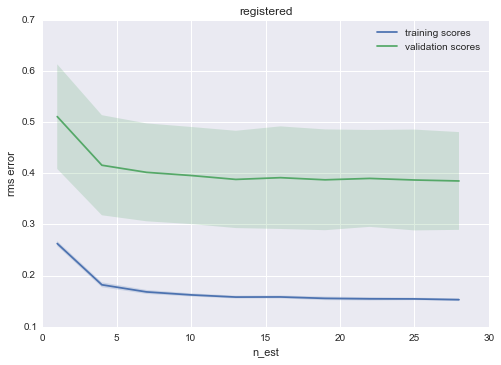

In [28]:
#varying the n_estimators for registered users
n_est = range(1,30,3)
val_train, val_test = validation_curve(RandomForestRegressor(max_depth = 17), X, y_registered,
                                       'n_estimators',n_est, cv=10,
                                       scoring=rms_error)
plot_with_err(n_est, val_train, label='training scores')
plot_with_err(n_est, val_test, label='validation scores')
plt.xlabel('n_est'); plt.ylabel('rms error')
plt.legend();
plt.title('registered')


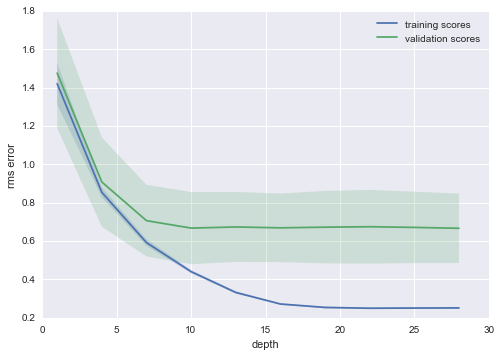

In [17]:
#varying the max_depth for casual users
depth = range(1,30,3)
val_train, val_test = validation_curve(RandomForestRegressor(n_estimators = 20), X, y_casual,
                                       'max_depth',depth, cv=10,
                                       scoring=rms_error)
plot_with_err(depth, val_train, label='training scores')
plot_with_err(depth, val_test, label='validation scores')
plt.xlabel('depth'); plt.ylabel('rms error')
plt.legend();
plt.title('casual')


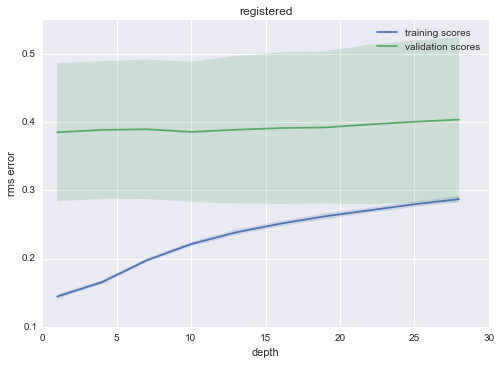

In [41]:
#varying the max_depth for registered users
depth = range(1,30,3)
val_train, val_test = validation_curve(RandomForestRegressor(n_estimators = 50,oob_score = True), X, y_registered,
                                       'min_samples_split',depth, cv=10,
                                       scoring=rms_error)
plot_with_err(depth, val_train, label='training scores')
plot_with_err(depth, val_test, label='validation scores')
plt.xlabel('depth'); plt.ylabel('rms error')
plt.title('registered')
plt.legend();


From the first trial of plotting validation curve, it seems like with max_depth ~ 7 to 12, and n_estimators = 15 to 20, the model seems to perform well enough in cross validation data. Now we plot the learning curve.

In [22]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(XX,yy,n_est = 200,depth = 20):
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(RandomForestRegressor(n_estimators=n_est,max_depth=depth),
                                                  XX,yy, train_sizes, cv=5,
                                                  scoring=rms_error)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    #plt.ylim(0, 0.1)
    #plt.xlim(5, 80)
    plt.legend()    

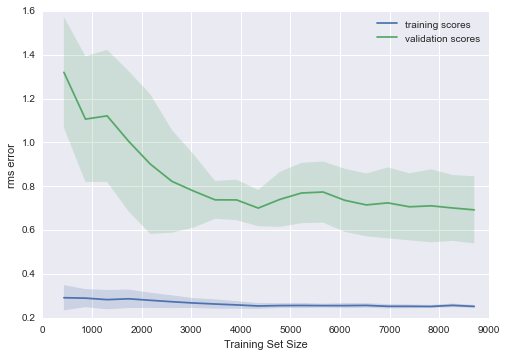

In [25]:
plot_learning_curve(X,y_casual,20,19)

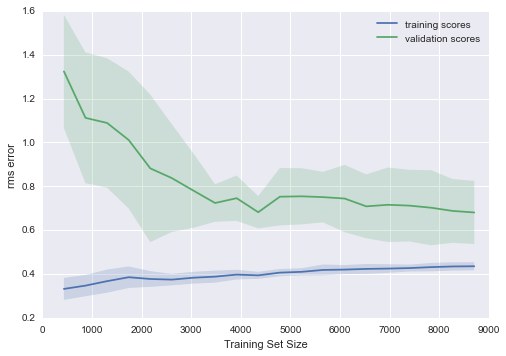

In [26]:
plot_learning_curve(X,y_casual,20,10)

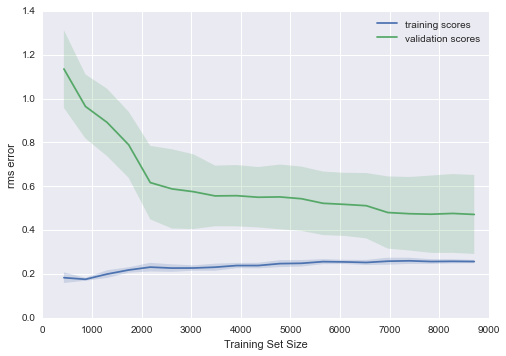

In [29]:
plot_learning_curve(X,y_registered,20,10)

Calculating for the test value

In [34]:
model_casual = RandomForestRegressor(n_estimators=200).fit(X,y_casual)
model_registered = RandomForestRegressor(n_estimators=200).fit(X,y_registered)

In [36]:
y_test = np.round(model_casual.predict(X_test) + model_registered.predict(X_test))
resultdf = pd.DataFrame(df_test['datetime'])
resultdf['count'] = y_test
resultdf.to_csv('randomforest.csv',index=False)